In [1]:
import os
from datasets import load_dataset
from PIL import Image
import pandas as pd
from easyocr import Reader
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import pytesseract


In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full content of each column (no truncation)
pd.set_option('display.width', None)

In [5]:
dataset = load_dataset("ahmedheakl/arocrbench_arabicocr",split="train")


train-00000-of-00001.parquet:   0%|          | 0.00/975k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50 [00:00<?, ? examples/s]

In [6]:
dataset

Dataset({
    features: ['image', 'source', 'text'],
    num_rows: 50
})

In [7]:
results = []
for sample in dataset:
    image = sample["image"]  # Already a PIL Image object
    if image.mode != "RGB":
        image = image.convert("RGB")
    ground_truth = sample["text"]
    results.append({
        "image": image,
        "ground_truth": ground_truth,
        "tesseract": None,
        "easyocr": None,
    })
print(f"Initialized results with {len(results)} samples.")

Initialized results with 50 samples.


### Tesseract Processing

In [8]:
for i, sample in enumerate(results):
    image = sample["image"]
    tesseract_text = pytesseract.image_to_string(image,lang='ara')
    results[i]['tesseract'] = tesseract_text
print("Tesseract Processing completeed")

Tesseract Processing completeed


## EasyOCR

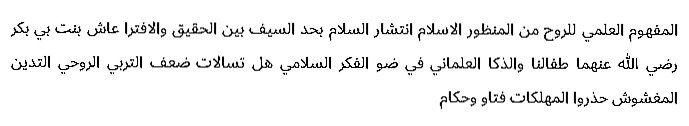

In [9]:
dataset[0]['image']

In [10]:
import numpy as np 
easyocr_reader = Reader(['ar'], gpu=True)
for i, sample in enumerate(results):
    image = sample["image"]
    image_np = np.array(image)
    easyocr_result = easyocr_reader.readtext(image_np, detail=0)
    easyocr_text = " ".join(easyocr_result)
    results[i]["easyocr"] = easyocr_text
print("EasyOCR processing completed.")

EasyOCR processing completed.


In [11]:
import re

def remove_diacritics(text):
    diacritics = [
        '\u0617', '\u0618', '\u0619', '\u061A',  # Small high signs
        '\u064B', '\u064C', '\u064D', '\u064E', '\u064F', '\u0650',  # Tanween and basic diacritics
        '\u0651', '\u0652', '\u0653', '\u0654', '\u0655', '\u0656',  # Shadda, sukun, etc.
        '\u0657', '\u0658', '\u0659', '\u065A', '\u065B', '\u065C', 
        '\u065D', '\u065E', '\u065F', '\u0670'   # Additional Arabic diacritics
    ]
    pattern = '[' + ''.join(diacritics) + ']'
    return re.sub(pattern, '', text)

In [12]:
df = pd.DataFrame(results)
df.head()

,image,ground_truth,tesseract,easyocr
0,<PIL.Image.Image image mode=RGB size=689x126 at 0x73B1AA9AFC90>,المفهوم العلمي للروح من المنظور الاسلام انتشار السلام بحد السيف بين الحقيق والافترا عاش بنت بي بكر رضي الله عنهما طفالنا والذكا العلماني في ضو الفكر السلامي هل تسالات ضعف التربي الروحي التدين المغشوش حذروا المهلكات فتاو وحكام,المقهوم العلمي للروح من المنظور الاسلام انتشار السلام بحد السيف بين الحقيق والافترا عاش بنت بي بكر\nرضي الله عنهما طفالنا والذكا العلمائي في ضو الفكر السلامي هل تسالات ضعف التربي الروحي التدين\nالمغشوش حذروا المهلكات فتاو وحكام\n,السيف بين الحقيق والافترا عاش بنت بي بكر من المذظور الاسلام اذتشار السلام بحد التدين مل تسالات مبد الفكر الله عنهما طفالنا والذكا العلماني وحكام المفشوش حذروا المهلكات للروح العلمب المفق 9م الروحب التدبب اللامي مو رضي فتاؤ
1,<PIL.Image.Image image mode=RGB size=689x128 at 0x73B1AA95A910>,فتاو وحكام السن والحديث قرا في كتاب سماح السلام في الدعو ل الله المفهوم العلمي لتسبيح الكانات لرب العالمين ندو بالقاهر حوار بين سر مسلم النيرات المنيرات كفال اليتيم الصبر عل البلا عمرك في يومك ثر اليمان في المجتمع هيا نمن فتاو وحكام,فتاو وحكام السن والحديث قرا في كتاب سماح السلام في الدعو ل الله المفهوم العلمي لتسبيح الكانات لرب.\nالعالمين ندو بالقاهر حوار بين سر مسلم النيرات المنيرات كفال اليتيم الصبر عل البلا عمرك في يومك ثر\nاليمان في المجتمع هيا نمن فتاو وحكام\n,لتسبيح الكانات لرب في الدعول الثه المفهوم فتاو وحكام السن والحديث قرا فيكتاب عل البلا عمرك التيم بالقاهر حوار بين سر مسله النيرات المنيرات العالمين وحكام المجتمع هيا اليمان العلمي السلام سماخ يومك _ 9دا كنال الصبر زا9 فتاو نمن قدج
2,<PIL.Image.Image image mode=RGB size=691x134 at 0x73B1AA187E50>,فتاو وحكام الجرح والتعديل قرا في كتاب حقيق السلام لمحمد السنراوي سرار العجاز العددي ف القرن الكريم كيف تقوي ثقتك بنفسك البحث عن ثقاف الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار السي للطمع كيف نقر القرن الكريم فتاو وحكام,فتاو وحكام الجرح والتعديل قرا في كتاب حقيق السلام لمحمد الستراوي سرار العجاز العددي ف القرن الكريم\nكيف تقوي ثقتك بنفسك البحث عن ثقاف الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار\nالمي للطمع كيف نقر القرن الكريم فتاو وحكام\n,حقيق السلام لمحمد السنداوي سدار العجاز العددي ف والتعديل قدا في فتاو وحكام الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار ثقتك بنفسك البحث عن ثقاف كيف فتاو وحكام كيف نقر القرن كتاب الجدح القرن الكريم تقوي للطمع السي الكريم
3,<PIL.Image.Image image mode=RGB size=691x170 at 0x73B1B0BC9DD0>,نادي نزو يحتف بختام نشطته الصيفي نشط ثقافي متنوع تنطلق في عاصم الثقاف العربي صنعا وزير الشون الجتماعي اللبناني يحذر العرب من الهجم الشرس لتحطيم عناصر قوتهم عدد جديد من مجل الهلال مشارك تشكيلي سوري في معرض فرانكفورت افتتاح هاد ونيق لمهرجان الاسكندري السينماي كل سبت نادي نزو يحتف بختام نشطته الصيفي,نادي نزو يحتف بختام نشطته الصيفي نشط ثقافي متنوع تنطلق في عاصم الثقاف العربي صنعا وزير الشونٍ\nالجتماعي اللبناني يحذر العرب من الهجم الشرس لتحطيم عناصر قوتهم عدد جديد من مجل الهلال مشارك\nتشكيلي سوري في معرض فرانكقورت افتتاح هاد ونيق لمهرجان الاسكندري السينماي كل سبت نادي نزو\nيحتف بختام نشطته الصيفي\n,صنعا وزير الشون عاصم التقاف متنوع تنطلق ذشح نادي نزو يحتف بحتام نشطته الصيفي عدد جديد من مجل الهلال مشارك يحذر العرب من الهجم الشرس لتحطيم الجتماعي نزو معرض فرانكفورت افتتاح هاد وذيق لمهرجان الاسكندري السينماي كل سوري بحتاج نشطته العربدي تفاي فوتهم عناصر اللبناني نادي لابت وا تشكيلب الصيفي يحت
4,<PIL.Image.Image image mode=RGB size=689x160 at 0x73B1AA95A250>,مسي شعري بالرستاق وزار التراث والثقاف تعلن عن اسما الفرق المسرحي الاهلي المشارك في مهرجان المسرح العماني الاول يقدم الدنيا حظوظ في رمضان القادم الكوميدي العراقي عامر العمري في حديث ل الوطن يحي عياش يعود من جديد من خلال الدراما السوري بيت ديكسون شاهد عل العمار التقليدي الكويتي مرايا مقاربات مسي شعري بالرستاق,مسي شعري بالرستاق وزار التراث والثقاف تعلن عن اسما الفرق المسرحي الاهلي المشارك في مهرجان\nالمسرح العمائي الاول يقدم الدنيا حظوظ في رمضان القادم الكوميدي العراقي عامر العمري في حديث ل\nالوطن يحي عياش يعود من جديد من خلال الدراما السوري بيت ديكسون شاهد عل العمار التقليدي الكويتي\n\nمرايا مقاربات مسي شعري بالرستاق\n,مهرجان المشارك الفرق تع

In [13]:

df['ground_truth_t'] = df["ground_truth"].apply(remove_diacritics)
df['tesseract_t'] = df["tesseract"].apply(remove_diacritics)
df['easyocr_t'] = df["easyocr"].apply(remove_diacritics)

In [14]:
df.head()


,image,ground_truth,tesseract,easyocr,ground_truth_t,tesseract_t,easyocr_t
0,<PIL.Image.Image image mode=RGB size=689x126 at 0x73B1AA9AFC90>,المفهوم العلمي للروح من المنظور الاسلام انتشار السلام بحد السيف بين الحقيق والافترا عاش بنت بي بكر رضي الله عنهما طفالنا والذكا العلماني في ضو الفكر السلامي هل تسالات ضعف التربي الروحي التدين المغشوش حذروا المهلكات فتاو وحكام,المقهوم العلمي للروح من المنظور الاسلام انتشار السلام بحد السيف بين الحقيق والافترا عاش بنت بي بكر\nرضي الله عنهما طفالنا والذكا العلمائي في ضو الفكر السلامي هل تسالات ضعف التربي الروحي التدين\nالمغشوش حذروا المهلكات فتاو وحكام\n,السيف بين الحقيق والافترا عاش بنت بي بكر من المذظور الاسلام اذتشار السلام بحد التدين مل تسالات مبد الفكر الله عنهما طفالنا والذكا العلماني وحكام المفشوش حذروا المهلكات للروح العلمب المفق 9م الروحب التدبب اللامي مو رضي فتاؤ,المفهوم العلمي للروح من المنظور الاسلام انتشار السلام بحد السيف بين الحقيق والافترا عاش بنت بي بكر رضي الله عنهما طفالنا والذكا العلماني في ضو الفكر السلامي هل تسالات ضعف التربي الروحي التدين المغشوش حذروا المهلكات فتاو وحكام,المقهوم العلمي للروح من المنظور الاسلام انتشار السلام بحد السيف بين الحقيق والافترا عاش بنت بي بكر\nرضي الله عنهما طفالنا والذكا العلمائي في ضو الفكر السلامي هل تسالات ضعف التربي الروحي التدين\nالمغشوش حذروا المهلكات فتاو وحكام\n,السيف بين الحقيق والافترا عاش بنت بي بكر من المذظور الاسلام اذتشار السلام بحد التدين مل تسالات مبد الفكر الله عنهما طفالنا والذكا العلماني وحكام المفشوش حذروا المهلكات للروح العلمب المفق 9م الروحب التدبب اللامي مو رضي فتاؤ
1,<PIL.Image.Image image mode=RGB size=689x128 at 0x73B1AA95A910>,فتاو وحكام السن والحديث قرا في كتاب سماح السلام في الدعو ل الله المفهوم العلمي لتسبيح الكانات لرب العالمين ندو بالقاهر حوار بين سر مسلم النيرات المنيرات كفال اليتيم الصبر عل البلا عمرك في يومك ثر اليمان في المجتمع هيا نمن فتاو وحكام,فتاو وحكام السن والحديث قرا في كتاب سماح السلام في الدعو ل الله المفهوم العلمي لتسبيح الكانات لرب.\nالعالمين ندو بالقاهر حوار بين سر مسلم النيرات المنيرات كفال اليتيم الصبر عل البلا عمرك في يومك ثر\nاليمان في المجتمع هيا نمن فتاو وحكام\n,لتسبيح الكانات لرب في الدعول الثه المفهوم فتاو وحكام السن والحديث قرا فيكتاب عل البلا عمرك التيم بالقاهر حوار بين سر مسله النيرات المنيرات العالمين وحكام المجتمع هيا اليمان العلمي السلام سماخ يومك _ 9دا كنال الصبر زا9 فتاو نمن قدج,فتاو وحكام السن والحديث قرا في كتاب سماح السلام في الدعو ل الله المفهوم العلمي لتسبيح الكانات لرب العالمين ندو بالقاهر حوار بين سر مسلم النيرات المنيرات كفال اليتيم الصبر عل البلا عمرك في يومك ثر اليمان في المجتمع هيا نمن فتاو وحكام,فتاو وحكام السن والحديث قرا في كتاب سماح السلام في الدعو ل الله المفهوم العلمي لتسبيح الكانات لرب.\nالعالمين ندو بالقاهر حوار بين سر مسلم النيرات المنيرات كفال اليتيم الصبر عل البلا عمرك في يومك ثر\nاليمان في المجتمع هيا نمن فتاو وحكام\n,لتسبيح الكانات لرب في الدعول الثه المفهوم فتاو وحكام السن والحديث قرا فيكتاب عل البلا عمرك التيم بالقاهر حوار بين سر مسله النيرات المنيرات العالمين وحكام المجتمع هيا اليمان العلمي السلام سماخ يومك _ 9دا كنال الصبر زا9 فتاو نمن قدج
2,<PIL.Image.Image image mode=RGB size=691x134 at 0x73B1AA187E50>,فتاو وحكام الجرح والتعديل قرا في كتاب حقيق السلام لمحمد السنراوي سرار العجاز العددي ف القرن الكريم كيف تقوي ثقتك بنفسك البحث عن ثقاف الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار السي للطمع كيف نقر القرن الكريم فتاو وحكام,فتاو وحكام الجرح والتعديل قرا في كتاب حقيق السلام لمحمد الستراوي سرار العجاز العددي ف القرن الكريم\nكيف تقوي ثقتك بنفسك البحث عن ثقاف الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار\nالمي للطمع كيف نقر القرن الكريم فتاو وحكام\n,حقيق السلام لمحمد السنداوي سدار العجاز العددي ف والتعديل قدا في فتاو وحكام الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار ثقتك بنفسك البحث عن ثقاف كيف فتاو وحكام كيف نقر القرن كتاب الجدح القرن الكريم تقوي للطمع السي الكريم,فتاو وحكام الجرح والتعديل قرا في كتاب حقيق السلام لمحمد السنراوي سرار العجاز العددي ف القرن الكريم كيف تقوي ثقتك بنفسك البحث عن ثقاف الشباب المسلم ومضات من جل حيا ناجح النيرات المنيرات الثار السي للطمع كيف نقر القرن الكريم فتاو وحكام,فتاو وحكام الجرح والتعديل

In [15]:
from jiwer import wer, cer 

for model in ["tesseract","easyocr"]:
    wer_score = wer(df["ground_truth"].tolist(), df[model].tolist())
    cer_score = cer(df["ground_truth"].tolist(), df[model].tolist())
    print(f"{model} - WER: {wer_score:.2f}, CER: {cer_score:.2f}")

tesseract - WER: 0.12, CER: 0.02
easyocr - WER: 0.76, CER: 0.56


In [16]:
from jiwer import wer, cer 

for model in ["tesseract_t","easyocr_t"]:
    wer_score = wer(df["ground_truth_t"].tolist(), df[model].tolist())
    cer_score = cer(df["ground_truth_t"].tolist(), df[model].tolist())
    print(f"{model} - WER: {wer_score:.2f}, CER: {cer_score:.2f}")

tesseract_t - WER: 0.12, CER: 0.02
easyocr_t - WER: 0.76, CER: 0.56


In [17]:
df.to_csv("khattat_arabicocr_result.csv")


: 